In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from statistics import mean
import math
import json

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
fuzz.token_set_ratio("ab cd efg", "efg cd ab")
fuzz.partial_ratio("ab cd efg", "efg cd ab")

47

In [3]:
file_name = "rag_fid_dprpoly_bart_seen.csv"
df_seen_e2e_kgdial = pd.read_csv(file_name)
df_seen_e2e_kgdial = df_seen_e2e_kgdial.replace({np.nan: None})
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence
0,0,Blue,Blue,Blue is one of the three primary colours of pi...,Blue is my favorite primary color.,Blue is one of the three primary colors of pig...
1,1,Cinematography,"Cinematography\nHi buddy, What you think about...","Cinematography (also called ""Direction of Phot...","Cinematography,is a type of motion picture , c...",I love cinematography! It has so many uses in ...
2,2,Genius,Genius,A genius is a person who displays exceptional ...,a genius is a person who displays exceptional ...,I am a genius! I have a degree in engineering ...
3,3,Husky,Husky\nI just got a husky puppy,Husky is a general name for a sled-type of dog...,It sounds cute! Huskies are known amongst sled...,I love huskies! They are so cute! I have a hus...
4,4,Forgetting,Forgetting,Forgetting or disremembering is the apparent l...,Forgetting is the process of losing informatio...,Forgetting is one of my biggest problems. I ca...
5,5,Budweiser,Budweiser\nI think Budweiser taste terrible. H...,Produced in various breweries around the world...,"Yes, and I love it! It's a filtered beer, and...","I have never had it, but it is an American-sty..."
6,6,Coors Brewing Company,Coors Brewing Company\nWho founded Coors Brewi...,"In 1873, German immigrants Adolph Coors and Ja...",In 1873 Adolph Coors and Jacob Schueler founde...,German immigrants Adolph Coors and Jacob Schue...
7,7,Italian cuisine,Italian cuisine\nI love Italian cuisine,It has developed through centuries of social a...,Oh yes! It is the best. It's really changed ...,"I love Italian food too! I love pasta, bread, ..."
8,8,Royal Blue (train),Blue is always nice. I like royal blue.,The Royal Blue was the Baltimore and Ohio Rail...,I once road on The Royal Blue train from New Y...,Blue is one of the three primary colors of pig...
9,9,Cinematography,"Yes buddy, Images captured with an electronic...","Typically, a lens is used to repeatedly focus ...",It works by lens used to repeatedly focus the ...,"The word used to refer to the art, process, or..."


In [4]:
l_ratio_checked_label = []
l_ratio_checked_generated = []
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"]:
        l_ratio_checked_label.append(None)
        l_ratio_checked_generated.append(None)
        continue
    checked_sentence = row["checked_sentence"]
    eval_label = row["eval_label"]
    generated_sentence = row["generated_sentence"]
    l_ratio_checked_label.append(fuzz.token_set_ratio(checked_sentence, eval_label))
    l_ratio_checked_generated.append(fuzz.token_set_ratio(checked_sentence, generated_sentence))
df_seen_e2e_kgdial["ratio_checked_label"] = l_ratio_checked_label
df_seen_e2e_kgdial["ratio_checked_generated"] = l_ratio_checked_generated
df_seen_e2e_kgdial.to_csv("examples.csv")

In [5]:
df_observe = df_seen_e2e_kgdial[df_seen_e2e_kgdial["ratio_checked_label"] > 70]

for index, row in df_observe.iterrows():
    print(row["last_sentence"])
    print(row["checked_sentence"])
    print(row["eval_label"])
    print(row["ratio_checked_label"])
    print(row["generated_sentence"])
    print(row["ratio_checked_generated"])
    print("----------------------")

Cinematography
Hi buddy, What you think about cinematography
Cinematography (also called "Direction of Photography") is the science or art of motion-picture photography by recording light or other electromagnetic radiation, either electronically by means of an image sensor, or chemically by means of a light-sensitive material such as film stock.
Cinematography,is a type of motion picture , captured electronically by means of an image 
91.0
I love cinematography! It has so many uses in science and business as well as for entertainment purposes and mass communication.
37.0
----------------------
Genius
A genius is a person who displays exceptional intellectual ability, creative productivity, universality in genres or originality, typically to a degree that is associated with the achievement of new advances in a domain of knowledge.
a genius is a person who displays exceptional intellectual ability.
100.0
I am a genius! I have a degree in engineering and have been called a genius by a lot

Piano construction is by now a rather conservative area; most of the technological advances were made by about 1900, and indeed it is possible that some contemporary piano buyers might actually be suspicious of pianos that are made differently from the older kind.
it hasnt been long like, Piano construction is by now a rather conservative area; most of the technological advances were made by about 1900
92.0
i dont think, In principle, the word "fortepiano" can designate any piano dating from the invention of the instrument by Bartolomeo Cristofori around 1700 
38.0
----------------------
That sounds really fun. I would love to try it.
Most roller coasters have multiple cars in which passengers sit and are restrained.
Most roller coasters have a lot of seats that more than a few passengers can sit and are restrained with safety harnesses.
84.0
You should try it. It is located on the Lake Erie peninsula in Sandusky, Ohio. 
17.0
----------------------
Each year, about 4,000 people die fro

I always believed in the value of it.  Probably because I was raised my a household of teachers.  
Educational methods include storytelling, discussion, teaching, training, and directed research.
I see. Educational methods include discussion, storytelling, training, research.
96.0
Yes, education can take place in formal or informal settings and any experience that has a formative effect on the way one thinks, feels, or acts may be considered educational.
36.0
----------------------
Yes, I have been to SouthBeach. It was awesome!
As the seat of Miami-Dade County, the municipality is the principal, central, and the most populous city of the Miami metropolitan area and part of the second-most populous metropolis in the southeastern United States.
The beach is wonderful! Miami is the second most populous metropolis is the southeast US!
75.0
I've never been to South Beach, but I've heard it's beautiful! It's the most populous city in Miami-Dade County.
61.0
----------------------
Do you kno

Bank teller
A bank teller (often abbreviated to simply teller) is an employee of a bank who deals directly with customers.
My brother is a bank teller,  is an employee of a bank who deals directly with customers.
92.0
I used to work as a bank teller. I was friendly and interacted with the customers, providing them with information about customers' accounts and bank services.
50.0
----------------------
I agree, the way they have ramped up production of new series is extremely impressive to me.
Netflix released an estimated 126 original series or films in 2016, more than any other network or cable channel.
It is. In 2016 Netflix released about 126 originals, more than any network or cable channel. Amazing, isn't it?!
79.0
I agree! They have expanded the production and distribution of both film and television series since 2012, and offers a variety of "Netflix Original" content through its online library.
42.0
----------------------
Iguana
Iguana (, ) is a genus of herbivorous lizards th

44.0
----------------------
 Varieties of the color yellow may differ in hue,or chroma 
It is a primary color in subtractive color systems, used in painting or color printing.
It is a primary color in subtractive color system
91.0
In the RGB color model, used to create colors on television and computer screens, yellow is a secondary color made by combining red and green at equal intensity.
41.0
----------------------
Nice, what types of guitars are out there?
An electric guitar is a guitar that uses one or more pickups to convert the vibration of its strings into electrical signals.
Well I think the coolest are the electric guitars.  They use one or more pickups to convert the string vibrations into electric signals.  examples are The Fender Stratocaster or The Gibson Les Paul
74.0
The classical guitar is an acoustical wooden guitar with six strings, usually nylon, and the Spanish guitar is also called the spanish guitar.
47.0
----------------------
I didn't know yacht racing was a thi

Interesting, I'm learning so much today. Do you know anything else about bacteria?
Cyanobacteria (which are prokaryotes) used to be called "blue-green algae".
Well Cyanobacteria are actually a form of blue-green algae.
74.0
The name "cyanobacteria" comes from the color of the bacteria, which is why they are called blue-green algae.
80.0
----------------------
Coco Chanel
Hey! What can you tell me about Coco Chanel?
Gabrielle Bonheur "Coco" Chanel (19 August 1883 – 10 January 1971) was a French fashion designer and businesswoman.
Hi, she was a french fashion designer that was born in 1883 
77.0
Gabrielle Bonheur "Coco" Chanel (19 August 1883 – 10 January 1971) was a French fashion designer and business woman.
100.0
----------------------
i live in N.J.
Chicago has often been called a global architecture capital and is considered one of the most important business centers in the world.
Chicago is famous for its architecture. It's considered to be a very important global business center. 

A trumpet is a brass instrument commonly used in classical and jazz ensembles.
I love the way the trumpet is  used in classical and jazz ensembles.
86.0
A trumpet is a brass instrument commonly used in classical and jazz ensembles. Do you play?
100.0
----------------------
Its believed that spaghetti with meatballs was an innovation of early 20th-century Italian immigrants in New York City
However, various kinds of pasta with meat are part of the culinary tradition of the Abruzzo, Apulia, Sicily, and other parts of southern Italy.
Yes, it's my city I love NYC. various kinds of pasta with meat are part of the culinary tradition of the Abruzzo, Apulia, Sicily they are just not put together like we do here. 
82.0
The National Pasta Association is said to be the first organization to publish a recipe for it in the 1920s.
28.0
----------------------
Wow. I never realized! Are there any characteristics a song needs to have to classify as rap?
Rapping (or rhyming, spitting, emceeing, MCing) i

----------------------
Farmer
A farmer (also called an agriculturer) is a person engaged in agriculture, raising living organisms for food or raw materials.
I am a farmer. A farmer (also called an agriculturer) is a person engaged in agriculture
97.0
A farmer is a person engaged in agriculture, raising living organisms for food or raw materials for food.
100.0
----------------------
Yes, and you could also say that our paleolithic and neolithic ancestors also practiced this diet, as they consumed mainly a plant based diet ( plants can't run away ).
The Paleolithic era is followed by the Mesolithic.
That is quite funny. Then what do you have to say about the Mesolithic era which followed the Paleolithic era
97.0
The earliest records of vegetarianism as a concept and practice amongst a significant number of religious groups and philosophers.
17.0
----------------------
It's so important for young people to have diverse interest and develop a wide range of skills, don't you think?
Boy Sco

47.0
----------------------
New York-style pizza
An employee, Antonio Totonno Pero, began making pizza, which sold for five cents a pie.
The first pizza sold for five cents a pie!
86.0
I love New York-style pizza. It's my favorite. I love the large hand-tossed thin crust.
31.0
----------------------
Yes, I went to visit my best friend and his family. There were 20 or so people in the room, all talking at once and I felt incredibly anxious.
Panic attacks can also occur under intense fear and discomfort.
Panic attacks are no fun and can occur under intense fear and discomfort. That is to many people
96.0
There are a lot of different types of anxiety disorders, such as generalized anxiety disorder, specific phobia, social anxiety disorder.
37.0
----------------------
That's interesting, I know they can be a real big handful the first few months, how long were you kept awake the first few months?
Parenting skills vary, and a parent with good parenting skills may be referred to as a "good p

92.0
Well, factories are basically factories that produce goods for which profit depends on economies of scale, especially those for which labor was simple and easy to supervise.
48.0
----------------------
Yes I was told there would be safety and orientation days before allowed to work
Factories manufacturing chemicals are often called "plants" and may have most of their equipment – tanks, pressure vessels, chemical reactors, pumps and piping – outdoors and operated from control rooms.
Well, luckily for the workers, if you're at a factory that deals with chemicals--which are usually called plants--then most of the equipment used, like tanks/pressure vessels/chemical reactors/pumps & piping, is all operated from a control room, with the equipment being outdoors. So, there's some safety built in.
83.0
That's a good idea. I'm sure you'll have to pay attention to that, since you'll be working with a lot of different chemicals, so you'll need to be aware of what you're doing and how it's g

oh I did not know that, learning something new 
Chenille is the French word for caterpillar whose fur the yarn is supposed to resemble.
Chenille is actually the French word for caterpillar whose fur the yarn is supposed to resemble
100.0
Archaeologists believe Stone Age people across Europe and Asia sewed fur and skin clothing using bone, antler or ivory needles and "thread" made of various animal body parts including sinew, catgut, and veins.
31.0
----------------------
Cooking
Cooking or cookery is the art, technology, science and craft of preparing food for consumption with or without the use of heat.
I can't do without cooking!  cookery is the art, technology, science and craft of preparing food
94.0
I love to cook. Cooking is the art, technology, science and craft of preparing food for consumption.
92.0
----------------------
That's interesting, what exactly is a chordophone?
A chordophone is a musical instrument that makes sound by way of a vibrating string or strings stretched b

In some situations, a kiss is a ritual, formal or symbolic gesture indicating devotion, respect, or sacrament.
Lol well In some situations, a kiss is a ritual, formal or symbolic gesture
93.0
In some situations, a kiss is a ritual, formal or symbolic gesture indicating devotion, respect, or sacrament.
100.0
----------------------
Bank teller
A bank teller (often abbreviated to simply teller) is an employee of a bank who deals directly with customers.
I used to be a bank teller and I dealt directly with the customers.
77.0
I used to work as a bank teller. I was friendly and interacted with the customers, providing them with information about customers' accounts and bank services.
50.0
----------------------
Not anything like that in my past, but I have PCOS and anxiety seems to go hand and hand with it.
To be diagnosed symptoms typically need to be present for at least six months, be more than would be expected for the situation, and decrease functioning.
To be diagnosed symptoms need t

In [6]:
dic_topic = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic:
        dic_topic[row["topic"]] = 1
    else:
        dic_topic[row["topic"]] +=1
l_count_topic = {}
for key,val in dic_topic.items():
    if val not in l_count_topic:
        l_count_topic[val] = 1
    else:
        l_count_topic[val] += 1
if file_name == "train_e2e_kgdial.csv":
    with open('training_dic_topic.json', 'w') as fp:
        json.dump(dic_topic, fp)
    fp.close()
else:
    fp = open('training_dic_topic.json',)
    dic_topic = json.load(fp)
    fp.close()
# l_count_topic
{k: v for k, v in sorted(dic_topic.items(), key=lambda item: item[1], reverse=True)}

{'Pizza': 919,
 'Dog': 603,
 'Blue': 540,
 'Veganism': 493,
 'Cat': 452,
 'Vegetarianism': 355,
 'Reading (process)': 354,
 'Swimming': 339,
 'New York City': 333,
 "McDonald's": 319,
 'Red hair': 294,
 'Hiking': 291,
 'Cooking': 283,
 'Night owl (person)': 267,
 'Parenting': 250,
 'Divorce': 247,
 'Yoga': 245,
 'Surfing': 243,
 'Chocolate': 240,
 'Steak': 236,
 'Armadillo': 236,
 'Golden Retriever': 225,
 'Heavy metal music': 222,
 'Florida': 222,
 'Sushi': 221,
 'Purple': 214,
 'Italian cuisine': 207,
 'Taco': 207,
 'Game of Thrones': 206,
 'Beach': 203,
 'The Beatles': 196,
 'Piano': 194,
 'Animal shelter': 194,
 'Gardening': 183,
 'Hamburger': 181,
 'Association football': 179,
 'Guitar': 179,
 'Ice cream': 172,
 'Drawing': 172,
 'Yellow': 172,
 'Country music': 171,
 'Ketogenic diet': 169,
 'Skateboarding': 167,
 'Honda Civic': 166,
 'Husky': 160,
 'Rose': 157,
 'Basketball': 155,
 'Tattoo': 151,
 'Violin': 151,
 'Only child': 150,
 'Coffee': 150,
 'Tennis': 144,
 'Chevrolet Corve

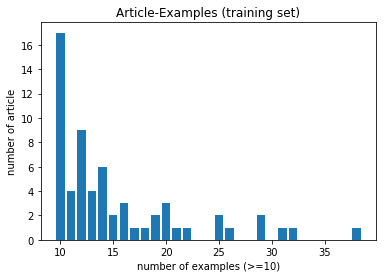

1184


In [7]:
plt_x = []
plt_y = []
count = 0
for key,val in l_count_topic.items():
    if key < 10:
        count += val
        continue
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Article-Examples (training set)");
plt.xlabel("number of examples (>=10)");
plt.ylabel("number of article");
plt.show()
print(count)

In [8]:
# plt_x = [10,20,30,40,50,60,70,80,90,100]
checked_eval = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
checked_gen = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
sum_checked_eval = 0
sum_checked_gen = 0
count = 0 
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    eval_value = math.ceil(row["ratio_checked_label"]/10)*10
    if eval_value == 0:
        eval_value = 10
    gen_value = math.ceil(row["ratio_checked_generated"]/10)*10
    if gen_value == 0:
        gen_value = 10
    checked_eval[eval_value] += 1
    checked_gen[gen_value] += 1
    sum_checked_eval += row["ratio_checked_label"]
    sum_checked_gen += row["ratio_checked_generated"]
    count += 1
print(count)
print(sum_checked_eval/count)
print(checked_eval)
print(sum_checked_gen/count)
print(checked_gen)

3649
68.38722937791175
{10: 1, 20: 6, 30: 37, 40: 202, 50: 436, 60: 602, 70: 661, 80: 650, 90: 568, 100: 486}
49.01178405042477
{10: 8, 20: 105, 30: 553, 40: 1179, 50: 754, 60: 242, 70: 103, 80: 71, 90: 89, 100: 545}


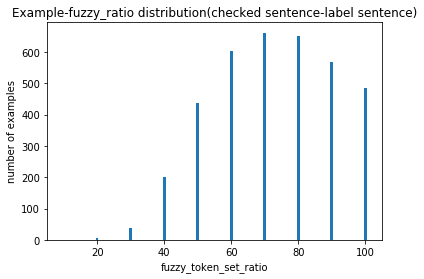

In [9]:
plt_x = []
plt_y = []
for key,val in checked_eval.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-label sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

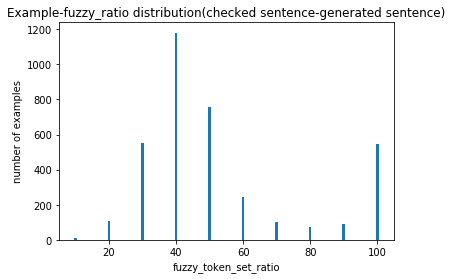

In [10]:
plt_x = []
plt_y = []
for key,val in checked_gen.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-generated sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

In [11]:
dic_topic_checked_eval_ratio = {}
dic_topic_checked_gen_ratio = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic_checked_eval_ratio:
        dic_topic_checked_eval_ratio[row["topic"]] = [row["ratio_checked_label"]]
    else:
        dic_topic_checked_eval_ratio[row["topic"]].append(row["ratio_checked_label"])
    if row["topic"] not in dic_topic_checked_gen_ratio:
        dic_topic_checked_gen_ratio[row["topic"]] = [row["ratio_checked_generated"]]
    else:
        dic_topic_checked_gen_ratio[row["topic"]].append(row["ratio_checked_generated"])
for key,val in dic_topic_checked_eval_ratio.items():
    dic_topic_checked_eval_ratio[key] = mean(val)
for key,val in dic_topic_checked_gen_ratio.items():
    dic_topic_checked_gen_ratio[key] = mean(val)
print(dic_topic_checked_eval_ratio)
print(dic_topic_checked_gen_ratio)

{'Blue': 66.26923076923077, 'Cinematography': 75.66666666666667, 'Genius': 97.25, 'Husky': 56.333333333333336, 'Forgetting': 83.33333333333333, 'Budweiser': 73.75, 'Coors Brewing Company': 96.5, 'Italian cuisine': 66.92307692307692, 'Royal Blue (train)': 74.0, 'Sled dog': 77.0, 'Coors Light': 71.0, 'Parmigiana': 34.0, 'Blue Skies (1946 film)': 53.0, 'Photography': 92.0, 'Chicken parmigiana': 71.5, 'Purple': 70.6, 'Digital camera': 80.0, 'Orc': 55.0, 'Molson Coors Brewing Company': 29.0, 'Cheddar cheese': 79.0, 'Digital photography': 95.0, 'The Rolling Stones': 67.0, 'New York City': 57.95, 'Football': 44.5, 'Coco Chanel': 69.22222222222223, 'Basenji': 96.0, 'Stephen Hawking': 64.33333333333333, 'Havanese dog': 69.0, 'Science fiction': 82.33333333333333, 'Iguana': 66.6875, 'Dog': 60.5, 'Manhattan': 44.0, 'History of the National Football League in Los Angeles': 84.0, 'Cake': 87.0, 'Lizard': 52.5, 'Origin of the domestic dog': 64.14285714285714, 'History of science fiction': 69.0, 'Balle

In [12]:
dic_example_topic_checked_eval_ratio = {}
dic_example_topic_checked_gen_ratio = {}
for key,val in dic_topic_checked_eval_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_eval_ratio:
        dic_example_topic_checked_eval_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_eval_ratio[dic_topic[key]].append(val)

for key,val in dic_topic_checked_gen_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_gen_ratio:
        dic_example_topic_checked_gen_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_gen_ratio[dic_topic[key]].append(val)

for key,val in dic_example_topic_checked_eval_ratio.items():
    dic_example_topic_checked_eval_ratio[key] = mean(val)
    
for key,val in dic_example_topic_checked_gen_ratio.items():
    dic_example_topic_checked_gen_ratio[key] = mean(val)
    
print(dic_example_topic_checked_eval_ratio)
print(dic_example_topic_checked_gen_ratio)

{540: 66.26923076923077, 83: 71.58333333333334, 38: 72.22916666666667, 160: 56.333333333333336, 11: 69.35416666666667, 49: 67.23, 48: 71.55898268398268, 207: 65.27403846153845, 0: 67.48997890295358, 7: 67.35227272727273, 4: 64.37096774193549, 1: 64.94090909090909, 84: 78.83333333333333, 214: 70.6, 5: 65.16538461538461, 34: 61.170833333333334, 3: 66.11969696969697, 140: 64.5, 333: 57.95, 47: 67.6, 39: 77.2910934744268, 2: 63.00769230769231, 87: 82.33333333333333, 79: 69.05059523809524, 603: 60.5, 9: 62.96363636363636, 60: 75.68055555555556, 114: 52.75, 41: 61.586309523809526, 80: 67.4074074074074, 76: 74.65476190476191, 6: 69.53225806451613, 36: 61.93214285714286, 35: 53.80714285714286, 115: 54.833333333333336, 37: 62.827777777777776, 92: 74.85833333333333, 155: 64.0, 44: 72.38571428571429, 14: 69.32222222222222, 17: 68.25208333333333, 104: 66.83333333333333, 106: 65.63690476190476, 81: 66.48125, 42: 67.28333333333333, 18: 68.68166666666667, 172: 71.525, 339: 72.48275862068965, 247: 68.

[540, 83, 38, 160, 11, 49, 48, 207, 0, 7, 4, 1, 84, 214, 5, 34, 3, 140, 333, 47, 39, 2, 87, 79, 603, 9, 60, 114, 41, 80, 76, 6, 36, 35, 115, 37, 92, 155, 44, 14, 17, 104, 106, 81, 42, 18, 172, 339, 247, 13, 121, 122, 134, 116, 31, 61, 8, 919, 30, 86, 194, 40, 73, 91, 22, 119, 29, 66, 45, 23, 19, 452, 58, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 15, 65, 117, 64, 90, 43, 12, 71, 143, 107, 96, 77, 63, 46, 110, 105, 354, 52, 283, 24, 167, 20, 68, 236, 221, 291, 245, 131, 59, 33, 222, 27, 151, 75, 109, 240, 243, 319, 53, 55, 99, 171, 355, 103, 16, 206, 183, 142, 32, 267, 57, 62, 10, 493, 196, 157, 25, 150, 144, 88, 95, 78, 179, 98, 250, 72, 74, 70, 111, 166, 97, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[66.26923076923077, 71.58333333333334, 72.22916666666667, 56.333333333333336, 69.35416666666667, 67.23, 71.55898268398268, 65.27403846153845, 67.48997890295358, 67.35227272727273, 64.37096774193549, 64.94090909090909, 78.83333333333333, 70.6, 65.16538461538461, 61.170833333333334, 66.11

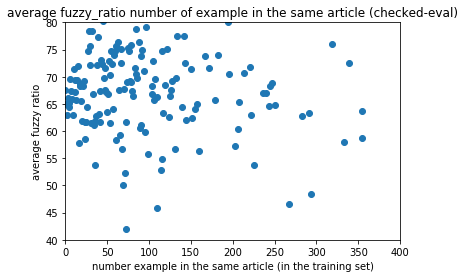

In [13]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_eval_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.scatter(plt_x,plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.title("average fuzzy_ratio number of example in the same article (checked-eval)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()

[540, 83, 38, 160, 11, 49, 48, 207, 0, 7, 4, 1, 84, 214, 5, 34, 3, 140, 333, 47, 39, 2, 87, 79, 603, 9, 60, 114, 41, 80, 76, 6, 36, 35, 115, 37, 92, 155, 44, 14, 17, 104, 106, 81, 42, 18, 172, 339, 247, 13, 121, 122, 134, 116, 31, 61, 8, 919, 30, 86, 194, 40, 73, 91, 22, 119, 29, 66, 45, 23, 19, 452, 58, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 15, 65, 117, 64, 90, 43, 12, 71, 143, 107, 96, 77, 63, 46, 110, 105, 354, 52, 283, 24, 167, 20, 68, 236, 221, 291, 245, 131, 59, 33, 222, 27, 151, 75, 109, 240, 243, 319, 53, 55, 99, 171, 355, 103, 16, 206, 183, 142, 32, 267, 57, 62, 10, 493, 196, 157, 25, 150, 144, 88, 95, 78, 179, 98, 250, 72, 74, 70, 111, 166, 97, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[66.15384615384616, 53.91666666666667, 43.260416666666664, 33.166666666666664, 45.4375, 45.47222222222222, 53.65638528138528, 45.17307692307692, 38.02426160337553, 47.15530303030303, 41.39193548387097, 39.393181818181816, 42.05555555555556, 73.2, 44.006410256410255, 53.02083333333333, 3

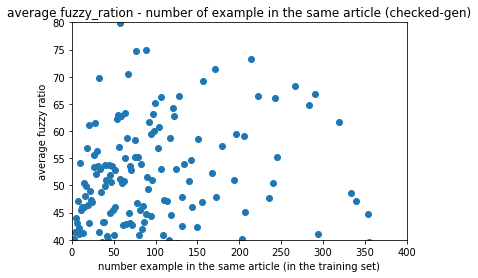

In [14]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_gen_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.scatter(plt_x,plt_y)
plt.title("average fuzzy_ration - number of example in the same article (checked-gen)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()